**Run the following two cells before you begin.**

In [4]:
%autosave 10

Autosaving every 10 seconds


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('cleaned_data.csv')

**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [6]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month',
 'graduate school.1',
 'high school.1',
 'others.1',
 'university.1']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [1]:
params_dict={'max_depth':[3,6,9,12],'n_estimators':[10,50,100,200]}

In [9]:
params_dict

{'max_depth': [3, 6, 9, 12], 'n_estimators': [10, 50, 100, 200]}

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [10]:
from sklearn.model_selection import GridSearchCV
gds=GridSearchCV(rf,param_grid=params_dict,verbose=2,)

____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [11]:
gds.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.5s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.5s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.4s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.5s
[CV] 

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                    

___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [12]:
gds_res=pd.DataFrame(gds.cv_results_)
gds_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.090720,0.008222,0.003692,0.002740,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.959222,0.958275,0.971402,0.966479,0.971167,0.965309,0.005645,15
1,0.448773,0.015968,0.016107,0.003459,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.927349,0.928504,0.956868,0.955931,0.942100,0.942151,0.012742,16
2,0.919076,0.141764,0.033327,0.010643,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.986876,1.000000,0.999766,1.000000,0.999531,0.997235,0.005182,13
3,1.751279,0.128633,0.058093,0.007405,3,200,"{'max_depth': 3, 'n_estimators': 200}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
4,0.125092,0.008969,0.002193,0.001901,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.998125,0.975387,1.000000,0.975152,0.999766,0.989686,0.011789,14
5,0.645943,0.034147,0.016795,0.001444,6,50,"{'max_depth': 6, 'n_estimators': 50}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
6,1.253592,0.089898,0.033744,0.002738,6,100,"{'max_depth': 6, 'n_estimators': 100}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
7,2.312608,0.056342,0.068700,0.007061,6,200,"{'max_depth': 6, 'n_estimators': 200}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
8,0.172956,0.023568,0.004248,0.003498,9,10,"{'max_depth': 9, 'n_estimators': 10}",1.000000,1.000000,1.000000,0.999297,1.000000,0.999859,0.000281,12
9,0.714181,0.067005,0.020951,0.004449,9,50,"{'max_depth': 9, 'n_estimators': 50}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1


**Find the best hyperparameters from the cross-validation.**

In [13]:
gds.best_params_

{'max_depth': 3, 'n_estimators': 200}

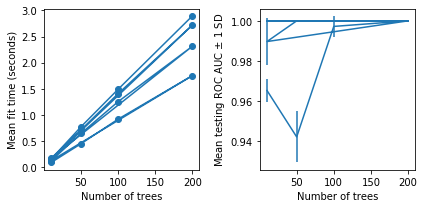

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(gds_res['param_n_estimators'],
            gds_res['mean_fit_time'],
            '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(gds_res['param_n_estimators'],
                gds_res['mean_test_score'],
                yerr=gds_res['std_test_score'])
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SD ')
plt.tight_layout()

________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [15]:
# Create a 5x5 grid
# Create a 5x5 grid
xx, yy = np.meshgrid(range(5), range(5))
print(xx)
print(yy)
print(xx.shape)
print(yy.shape)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]
(5, 5)
(5, 5)


In [16]:
# Set color map to `plt.cm.jet`
gds_res_mean_ts_rs=gds_res['mean_test_score'].values.reshape(4,4)
gds_res_mean_ts_rs

array([[0.96530899, 0.94215062, 0.99723456, 1.        ],
       [0.98968598, 1.        , 1.        , 1.        ],
       [0.99985935, 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        ]])

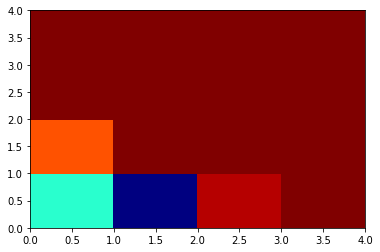

In [17]:
# Visualize pcolormesh
ax=plt.axes()
pcolor=ax.pcolormesh(xx,yy,gds_res_mean_ts_rs,cmap=plt.cm.jet)


Text(0, 0.5, 'Y coordinate')

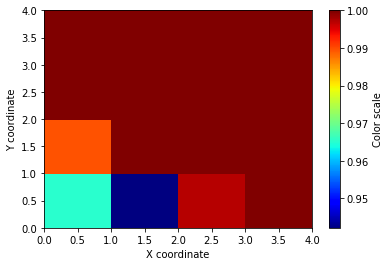

In [18]:
# Visualize pcolormesh
ax=plt.axes()
pcolor=ax.pcolormesh(xx,yy,gds_res_mean_ts_rs,cmap=plt.cm.jet)
plt.colorbar(pcolor, label='Color scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [19]:
# Create a dataframe of the feature names and importance
gds_feat_imp=pd.DataFrame({'Features':features_response[:-1],'Importance':gds.best_estimator_.feature_importances_})
gds_feat_imp

,Features,Importance
0,LIMIT_BAL,0.037992
1,EDUCATION,0.000433
2,MARRIAGE,0.000204
3,AGE,0.000944
4,PAY_1,0.214679
5,BILL_AMT1,0.003755
6,BILL_AMT2,0.003377
7,BILL_AMT3,0.005112
8,BILL_AMT4,0.008578
9,BILL_AMT5,0.003596


In [20]:
# Sort values by importance
gds_feat_imp.sort_values(by='Importance',ascending=False)

,Features,Importance
17,default payment next month,0.621997
4,PAY_1,0.214679
0,LIMIT_BAL,0.037992
11,PAY_AMT1,0.035990
12,PAY_AMT2,0.024022
13,PAY_AMT3,0.016182
14,PAY_AMT4,0.010381
8,BILL_AMT4,0.008578
7,BILL_AMT3,0.005112
16,PAY_AMT6,0.005108
